In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML1.1%20linear%20regression/data/x.csv',
                index_col=0)["0"]
y = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML1.1%20linear%20regression/data/y.csv',
                index_col=0)["0"]

In [6]:
x.head(), y.head()

(0    1.462108
 1    1.133769
 2   -2.301539
 3    1.744812
 4    0.042214
 Name: 0, dtype: float64,
 0    101.159902
 1     78.442913
 2   -159.238195
 3    120.719533
 4      2.920673
 Name: 0, dtype: float64)

In [7]:
x.shape, y.shape

((20,), (20,))

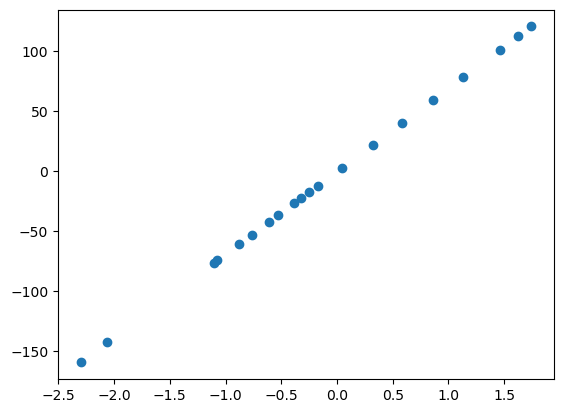

In [8]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [70]:
class Model(object):
    """Модель парной линейной регрессии y = b0 + b1 * x"""

    def __init__(self, max_iter=50):
        self.b0 = 1
        self.b1 = 1
        self.max_iter = max_iter

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, x, y):
        """J = y_pred - y_true"""
        return sum((self.predict(x) - y) ** 2) / (2 * len(y))

    def fit(self, x, y):
        alpha = 1
        errors = [self.error(x, y), ]
        for _ in range(self.max_iter):
            dj0 = sum(self.predict(x) - y) / len(y)
            dj1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alpha * dj0
            self.b1 -= alpha * dj1

            new_err = self.error(x, y)
            old_err = errors[-1]

            if old_err - new_err < 0.000001:
                break

            errors.append(self.error(x, y))
        else:
            print("Warning!")
        return errors

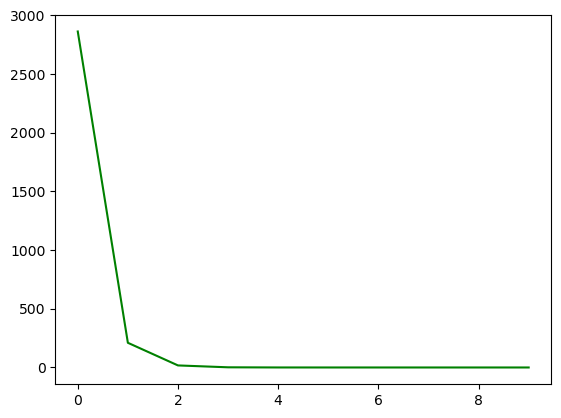

In [71]:
model = Model(max_iter=1000)
errors = model.fit(x, y)
plt.plot(errors, c='g')

In [63]:
model.fit(x, y)
print("Конечная ошибка", model.error(x, y))

Конечная ошибка 5.902024568353867e-06


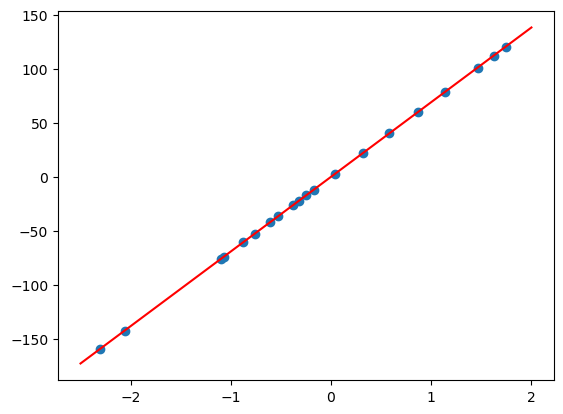

In [60]:
plt.figure()
plt.scatter(x, y)

x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'r')

plt.show()